In [1]:
import festim as F
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt


my_model = F.Simulation()
N_A_const=const.N_A
my_model.mesh = F.MeshFromVertices(
    vertices=np.linspace(0, 1E-3, num=1001)
)
my_model.materials = F.Material(id=1, D_0=1.9e-7, E_D=0.2)
my_model.T = F.Temperature(value=1000)
P_up = 1E5 # Pa

my_model.boundary_conditions = [
    F.DirichletBC(surfaces=1, value=0.0088*N_A_const,field=0),
    F.DirichletBC(surfaces=2, value=0, field=0)
]
rho_n=6.338E28
trap = F.Trap(
            k_0=1.58E7/N_A_const,
            E_k=0.2,
            p_0=1e13,
            E_p=1,
            density=1E-3*rho_n,
            materials=my_model.materials.materials[0]
        )

my_model.traps = [trap]
my_model.settings = F.Settings(
    absolute_tolerance=1e10,
    relative_tolerance=1e-10,
    final_time=100  # s
    )
my_model.dt = F.Stepsize(0.5)
derived_quantities = F.DerivedQuantities([F.HydrogenFlux(surface=2)])


my_model.exports = [derived_quantities]

In [2]:
my_model.initialise()



Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions


In [3]:
import os
current_working_directory = os.getcwd()
if current_working_directory.endswith("Festim_models/Jupyter_notebooks"):
    os.chdir('../../graph_scripts_and_results/WeakTrap')
else:
    os.chdir('graph_scripts_and_results/WeakTrap')
my_model.run()


Time stepping...
100.0 %        1.0e+02 s    Ellapsed time so far: 2.4 s


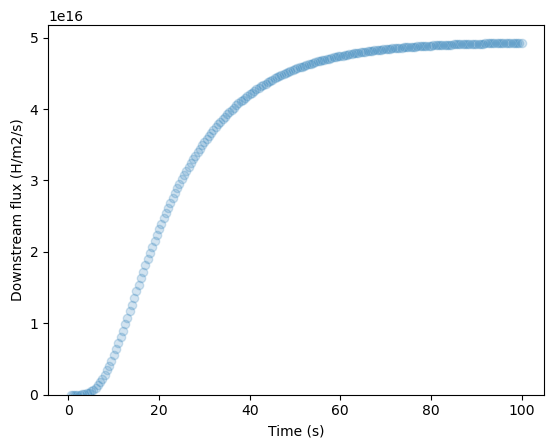

In [4]:

times = derived_quantities.t
computed_flux = derived_quantities.filter(surfaces=2).data
plt.scatter(times, np.abs(computed_flux)/2, alpha=0.2, label="computed")
plt.ylim(bottom=0)
plt.xlabel("Time (s)")
plt.ylabel("Downstream flux (H/m2/s)")

np.savetxt('Weak_flux_festim.txt',np.column_stack([times,np.abs(computed_flux)/2]))